In [114]:
# -*- coding: utf-8 -*-
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #visualisation
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate predictions and save ouput in csv format for submission:

## Steps:
1. Run and tune all methods on the full unchanged dataset and compare them
-- Use Grid Search for fitting ployn ...
2. Do feature selection, data cleaning, and so on - compare improvements
-- Do visualization

## Load the training data into feature matrix, class labels, and event ids:

In [115]:
from implementations import *
from helpers_perso import *
from plots import *

### Load unchanged dataset

In [116]:
from proj1_helpers import *
from zipfile import ZipFile

DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
with ZipFile('../data/train.csv.zip', 'r') as zip:
    zip.extractall('../data')
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

Standardize

In [117]:
tX, mean_X, std_X = standardize(tX)

Change labels which are -1 to 0

In [118]:
# Binary problem change the labels in y 
print("Example", y[0:10])
y = np.where(y == -1, 0, y)
print("Example after", y[0:10])

Example [ 1. -1. -1. -1. -1. -1.  1.  1. -1.  1.]
Example after [1. 0. 0. 0. 0. 0. 1. 1. 0. 1.]


# Training with the unchanged dataset

### Create Train, Validate and a Test Set

In [119]:
# from train take 20% as a validation set and 10% as a test set
tX_train, tX_val, y_train, y_val = split_data(tX, y, ratio=0.8, seed=1)
print("Size of the train set: {}. Size of the validation set: {}.".format(tX_train.shape[0], tX_val.shape[0]))

Size of the train set: 200000. Size of the validation set: 50000.


In [120]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
with ZipFile('../data/test.csv.zip', 'r') as zip:
    zip.extractall('../data')
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
print("Size of the test set: {}.".format(tX_test.shape[0]))
# Standardize
tX_test, mean_X_test, std_X_test = standardize(tX_test)

Size of the test set: 568238.


### Training with least squares

TP: 8466, TN: 28766, FP: 4004, FN: 8764


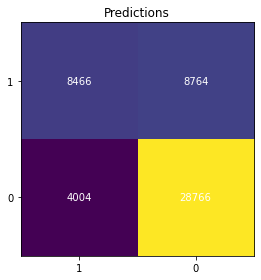

Recall: 0.4913522925130586
Precision: 0.6789093825180433
F_2 score: 0.5200884629561371
Accruacy: 0.74464
MSE loss 0.08514995999178518
Prediction example [0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]


In [138]:
# Training on the learning dataset

train_loss, weights = least_squares(y_train, tX_train)
# Estimating the predictions on the validation set
# pred_val = tX_val@weights
pred_val = predict_labels(weights, tX_val) 
# Confusion matrix
tp, tn, fp, fn = calc_rates(y_val, pred_val)
vis_conf_mtx(conf_matrix(tp, tn, fp, fn))
# Recall, Precision, F2-Score, Accruacy
f_score(recall(tp, fn), precision(tp, fp))
accruacy(tp, tn, fp, fn)
# Computing the mse resulting from the validation set
### odd: just predicted now again
mse_test = compute_loss_mse(y_val, tX_val, weights)
print("MSE loss", mse_test)
print("Prediction example", pred_val[:10])

### Training with least squares gradient descent

In step: 100%|████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 133.44it/s]


TP: 6520, TN: 24841, FP: 7929, FN: 10710


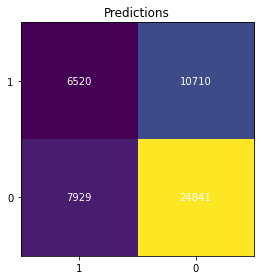

Recall: 0.3784097504352873
Precision: 0.4512423005052253
F_2 score: 0.3910326380309228
Accruacy: 0.62722
MSE loss 4.396237924387729e+234
Prediction example [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [97]:
# Training on the learning dataset

train_loss, weights = least_squares_GD(y_train, tX_train, initial_w=np.zeros(tX_train.shape[1]), max_iters=1000, gamma=0.1)
# Estimating the predictions on the validation set
# pred_val = tX_val@weights
pred_val = predict_labels(weights, tX_val)
# Confusion matrix
tp, tn, fp, fn = calc_rates(y_val, pred_val)
vis_conf_mtx(conf_matrix(tp, tn, fp, fn))
# Recall, Precision, F2-Score, Accruacy
f_score(recall(tp, fn), precision(tp, fp))
accruacy(tp, tn, fp, fn)
# Computing the mse resulting from the validation set
### odd: just predicted now again
mse_test = compute_loss_mse(y_val, tX_val, weights)
print("MSE loss", mse_test)
print("Prediction example", pred_val[:10])

### Training with least squares stochastic gradient descent

C:\Users\galan\Google Drive\cours EPFL\ML\ml-project-1-mgo\project1\scripts\implementations.py:16: RuntimeWarning: overflow encountered in square
  return 1/2*np.mean(e**2)


TP: 4785, TN: 27265, FP: 5505, FN: 12445


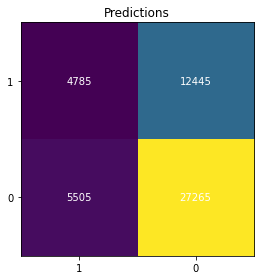

Recall: 0.2777132907719095
Precision: 0.4650145772594752
F_2 score: 0.3020451963135968
Accruacy: 0.641
MSE loss inf
Prediction example [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [121]:
# Training on the learning dataset

train_loss, weights = least_squares_SGD(y_train, tX_train, initial_w=np.zeros(tX_train.shape[1]), max_iters=1000, gamma=0.1)
# Estimating the predictions on the validation set
# pred_val = tX_val@weights
pred_val = predict_labels(weights, tX_val) 
# Confusion matrix
tp, tn, fp, fn = calc_rates(y_val, pred_val)
vis_conf_mtx(conf_matrix(tp, tn, fp, fn))
# Recall, Precision, F2-Score, Accruacy
f_score(recall(tp, fn), precision(tp, fp))
accruacy(tp, tn, fp, fn)
# Computing the mse resulting from the validation set
### odd: just predicted now again
mse_test = compute_loss_mse(y_val, tX_val, weights)
print("MSE loss", mse_test)
print("Prediction example", pred_val[:10])

### Training with Newton method on logistic loss

TP: 5525, TN: 30875, FP: 1895, FN: 11705


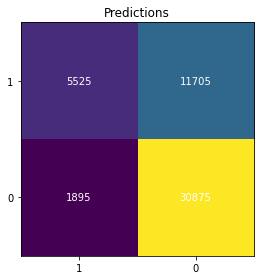

Recall: 0.3206616366802089
Precision: 0.7446091644204852
F_2 score: 0.361867959130207
Accruacy: 0.728
Logistic loss 24946.857354656284
Prediction example [0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]


In [58]:
# Training on the learning dataset

train_loss, weights = learning_by_newton_method(y_train, tX_train, initial_w=np.zeros(tX_train.shape[1]), max_iters=1000, gamma=0.5)
# Estimating the predictions on the validation set
pred_val = predict_labels(weights, tX_val)
# Confusion matrix
tp, tn, fp, fn = calc_rates(y_val, pred_val)
vis_conf_mtx(conf_matrix(tp, tn, fp, fn))
# Recall, Precision, F2-Score, Accruacy
f_score(recall(tp, fn), precision(tp, fp))
accruacy(tp, tn, fp, fn)
# Computing the logistic loss resulting from the validation set
loss_test = calculate_loss(y_val, tX_val, weights)
print("Logistic loss", loss_test)
print("Prediction example", pred_val[:10])

### Training with Gradient Descent on logistic loss

C:\Users\galan\Google Drive\cours EPFL\ML\ml-project-1-mgo\project1\scripts\implementations.py:169: RuntimeWarning: overflow encountered in exp
  
C:\Users\galan\Google Drive\cours EPFL\ML\ml-project-1-mgo\project1\scripts\implementations.py:182: RuntimeWarning: divide by zero encountered in log
  


TP: 2297, TN: 32196, FP: 574, FN: 14933


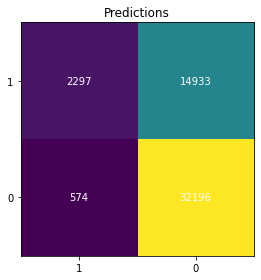

Recall: 0.13331398723157284
Precision: 0.8000696621386276
F_2 score: 0.1599782702567174
Accruacy: 0.68986
Logistic loss nan
Prediction example [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [61]:
# Training on the learning dataset

train_loss, weights = logistic_regression(y_train, tX_train, initial_w=np.zeros(tX_train.shape[1]), max_iters=1000, gamma=0.1)
# Estimating the predictions on the validation set
pred_val = predict_labels(weights, tX_val)
# Confusion matrix
tp, tn, fp, fn = calc_rates(y_val, pred_val)
vis_conf_mtx(conf_matrix(tp, tn, fp, fn))
# Recall, Precision, F2-Score, Accruacy
f_score(recall(tp, fn), precision(tp, fp))
accruacy(tp, tn, fp, fn)
# Computing the logistic loss resulting from the validation set
loss_test = calculate_loss(y_val, tX_val, weights)
print("Logistic loss", loss_test)
print("Prediction example", pred_val[:10])

### Training with regularized logistic regression

TP: 281, TN: 32757, FP: 13, FN: 16949


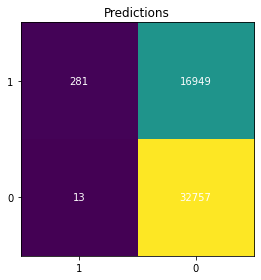

Recall: 0.016308763784097503
Precision: 0.95578231292517
F_2 score: 0.020299361400872656
Accruacy: 0.66076
Logistic loss nan
Prediction example [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [60]:
# Training on the learning dataset

train_loss, weights = reg_logistic_regression(y_train, tX_train, lambda_=0.5, initial_w=np.zeros(tX_train.shape[1]), max_iters=1000, gamma=0.1)
# Estimating the predictions on the validation set
pred_val = predict_labels(weights, tX_val)
# Confusion matrix
tp, tn, fp, fn = calc_rates(y_val, pred_val)
vis_conf_mtx(conf_matrix(tp, tn, fp, fn))
# Recall, Precision, F2-Score, Accruacy
f_score(recall(tp, fn), precision(tp, fp))
accruacy(tp, tn, fp, fn)
# Computing the logistic loss resulting from the validation set
loss_test = calculate_loss(y_val, tX_val, weights)
print("Logistic loss", loss_test)
print("Prediction example", pred_val[:10])

### Exploring the data

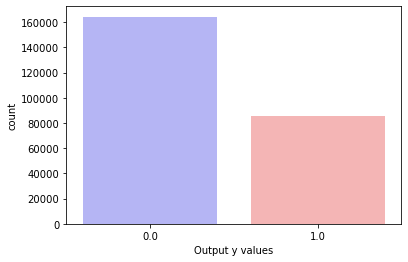

In [122]:
#Exploring y
sns.countplot(x = y, palette = "bwr") 
plt.xlabel("Output y values")
plt.show()

We can remark that the data are not well balanced for the output and this can cause some trouble.

30


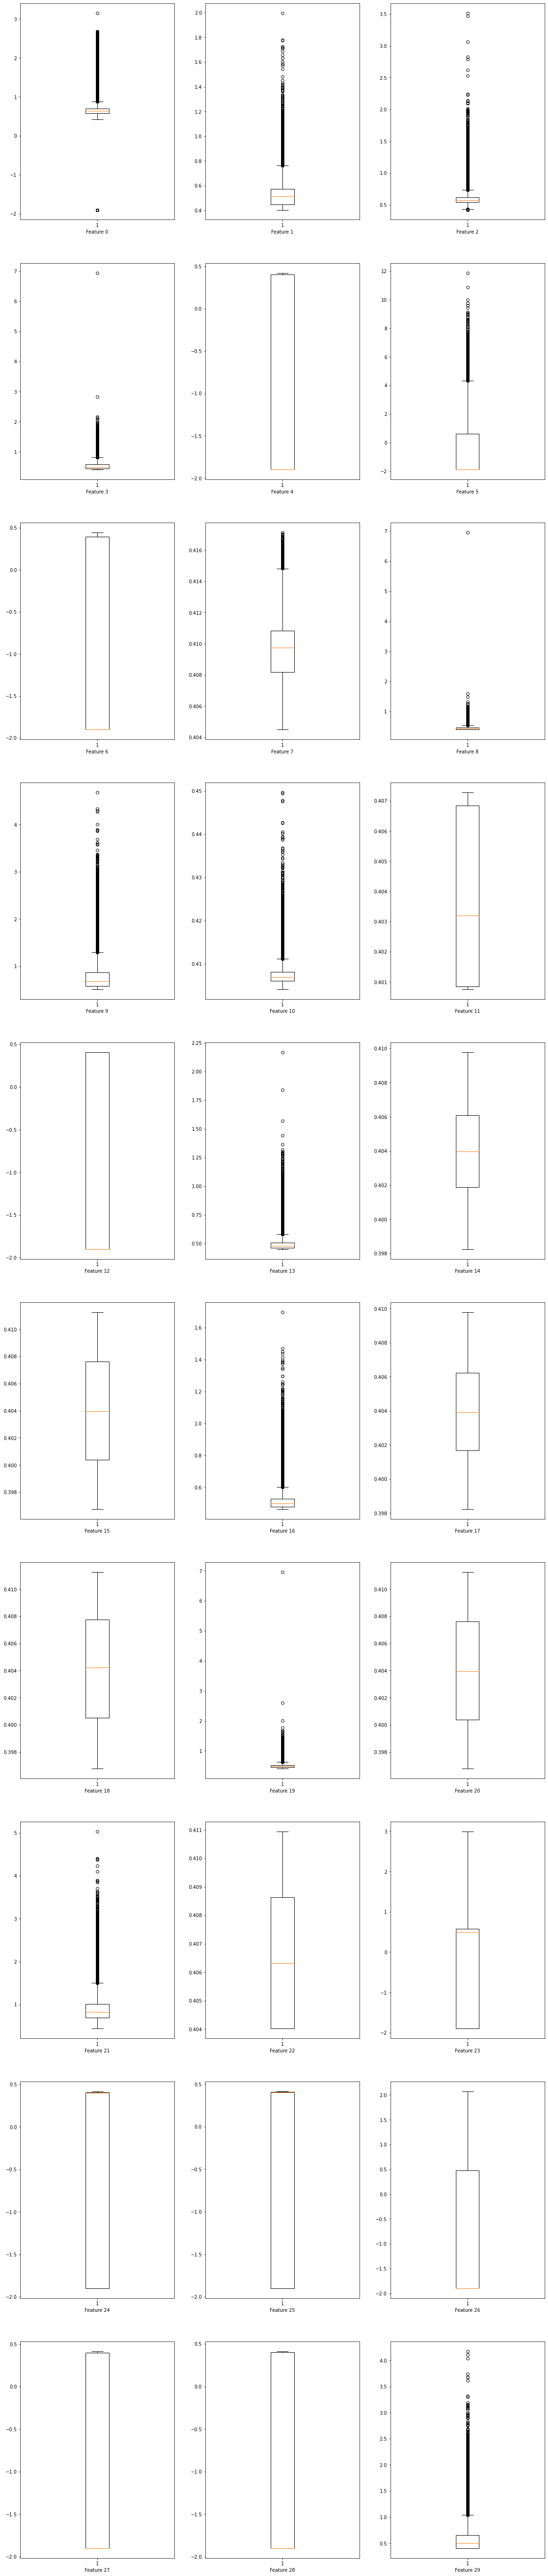

In [123]:
fig = plt.figure()
print(tX.shape[1])
number_features = tX.shape[1]
for i in range(0, number_features):
    ax = fig.add_subplot(10, 3, i+1)
    #remove useless values
    tX_tmp = tX[:, i]
    tX_tmp = tX_tmp[tX_tmp > -999]
    plt.boxplot(tX_tmp)
    plt.xlabel("Feature " + str(i))
fig.set_size_inches(20, 100)

30


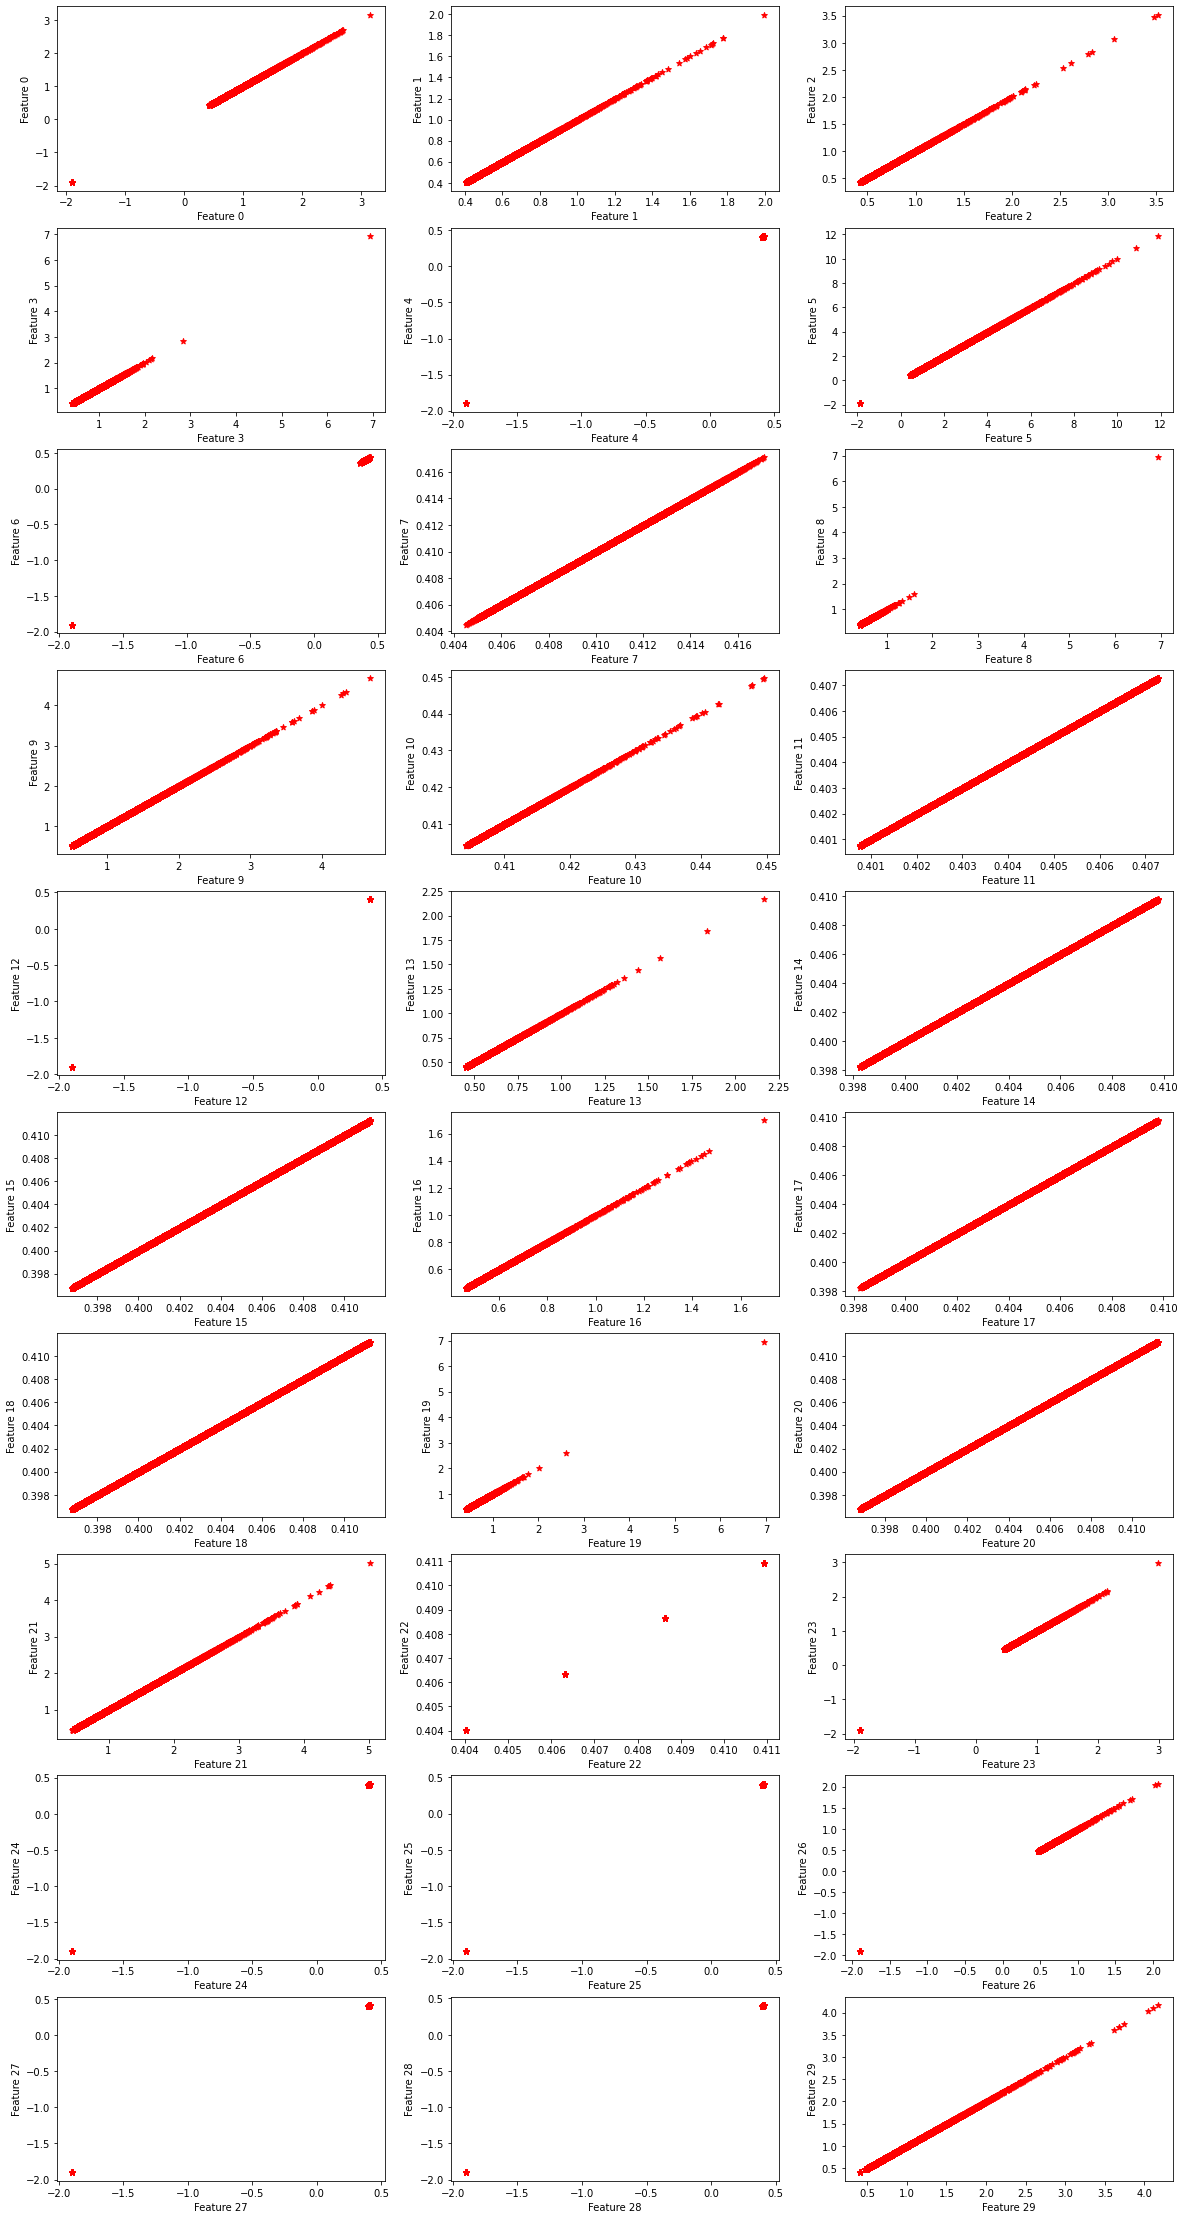

In [124]:
fig = plt.figure()
print(tX.shape[1])
number_features = tX.shape[1]
for i in range(0, number_features):
    ax = fig.add_subplot(10, 3, i+1)
    #remove useless values
    tX_tmp = tX[:, i]
    tX_tmp = tX_tmp[tX_tmp > -999]
    ax.scatter(tX_tmp, tX_tmp, marker= "*", color= "r")
    ax.set_xlabel("Feature " + str(i))
    ax.set_ylabel("Feature " + str(i))
fig.set_size_inches(20, 40)

### Interpretation

Thoses graphs shows the distribution of the features. 
We can see directly that a feature is categorical :
- Feature with 4 categories : 22

For the other features, we can see that only a few of them seems well distributed whereas the other have some outliers :
- Features with Outliers : 0, 1, 2, 3, 5, 8, 9, 10, 13, 16, 19, 21, 26, 29



# Feature processing 

Feature processing : Cleaning the dataset by removing useless features and values, combining others, finding better representations of the features to feed your model, scaling the features, and so on. Check this article
on feature engineering: 

http://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/

## Removing useless features

In [125]:
tX
tX.shape

(250000, 30)

In [126]:
# Removing useless features

# We begin by removing all the line with a PRI_jet_all_pt equal to 0
#print(tX.shape, y.shape, ids.shape)
#line_array = np.int_([])
#for i in range (tX.shape[0]):
#    if tX[i, 29] == 0. :
#        line_array = np.append(line_array, i)
#tX = np.delete(tX, line_array, axis=0)
#y = np.delete(y, line_array, axis=0)
#ids = np.delete(ids, line_array, axis=0) 
#tX = tX[np.where(tX[:, 29] != 0.)]
#print(tX[:15,:])
#tX.shape, y.shape, ids.shape

In [127]:
#Useless feature with

In [128]:
# Removing rows with missing values (Nan)

#tX = tX[~np.isnan(tX).any(axis=1)]
#print(tX[:15,:])
#tX.shape

In [129]:
#Correlation between features
linear_relation = []
mat = np.corrcoef(tX, rowvar = 0)
#print(mat)
for i in range(mat.shape[0]):
    for j in range(0, i):
        if mat[i, j] > 0.999:
            linear_relation.append((j, i, mat[i, j]))
linear_relation

[(4, 6, 0.999981427683373),
 (4, 12, 0.999998385713681),
 (6, 12, 0.9999896746909257),
 (24, 25, 0.9999918368931452),
 (4, 26, 0.9993463699208783),
 (6, 26, 0.9993465738419863),
 (12, 26, 0.9993546311799884),
 (4, 27, 0.9999949302305667),
 (6, 27, 0.9999879777937465),
 (12, 27, 0.9999969759820079),
 (26, 27, 0.9993523477702594),
 (4, 28, 0.9999955433879189),
 (6, 28, 0.999988606946523),
 (12, 28, 0.9999975565729733),
 (26, 28, 0.9993518514848255),
 (27, 28, 0.9999947740006537)]

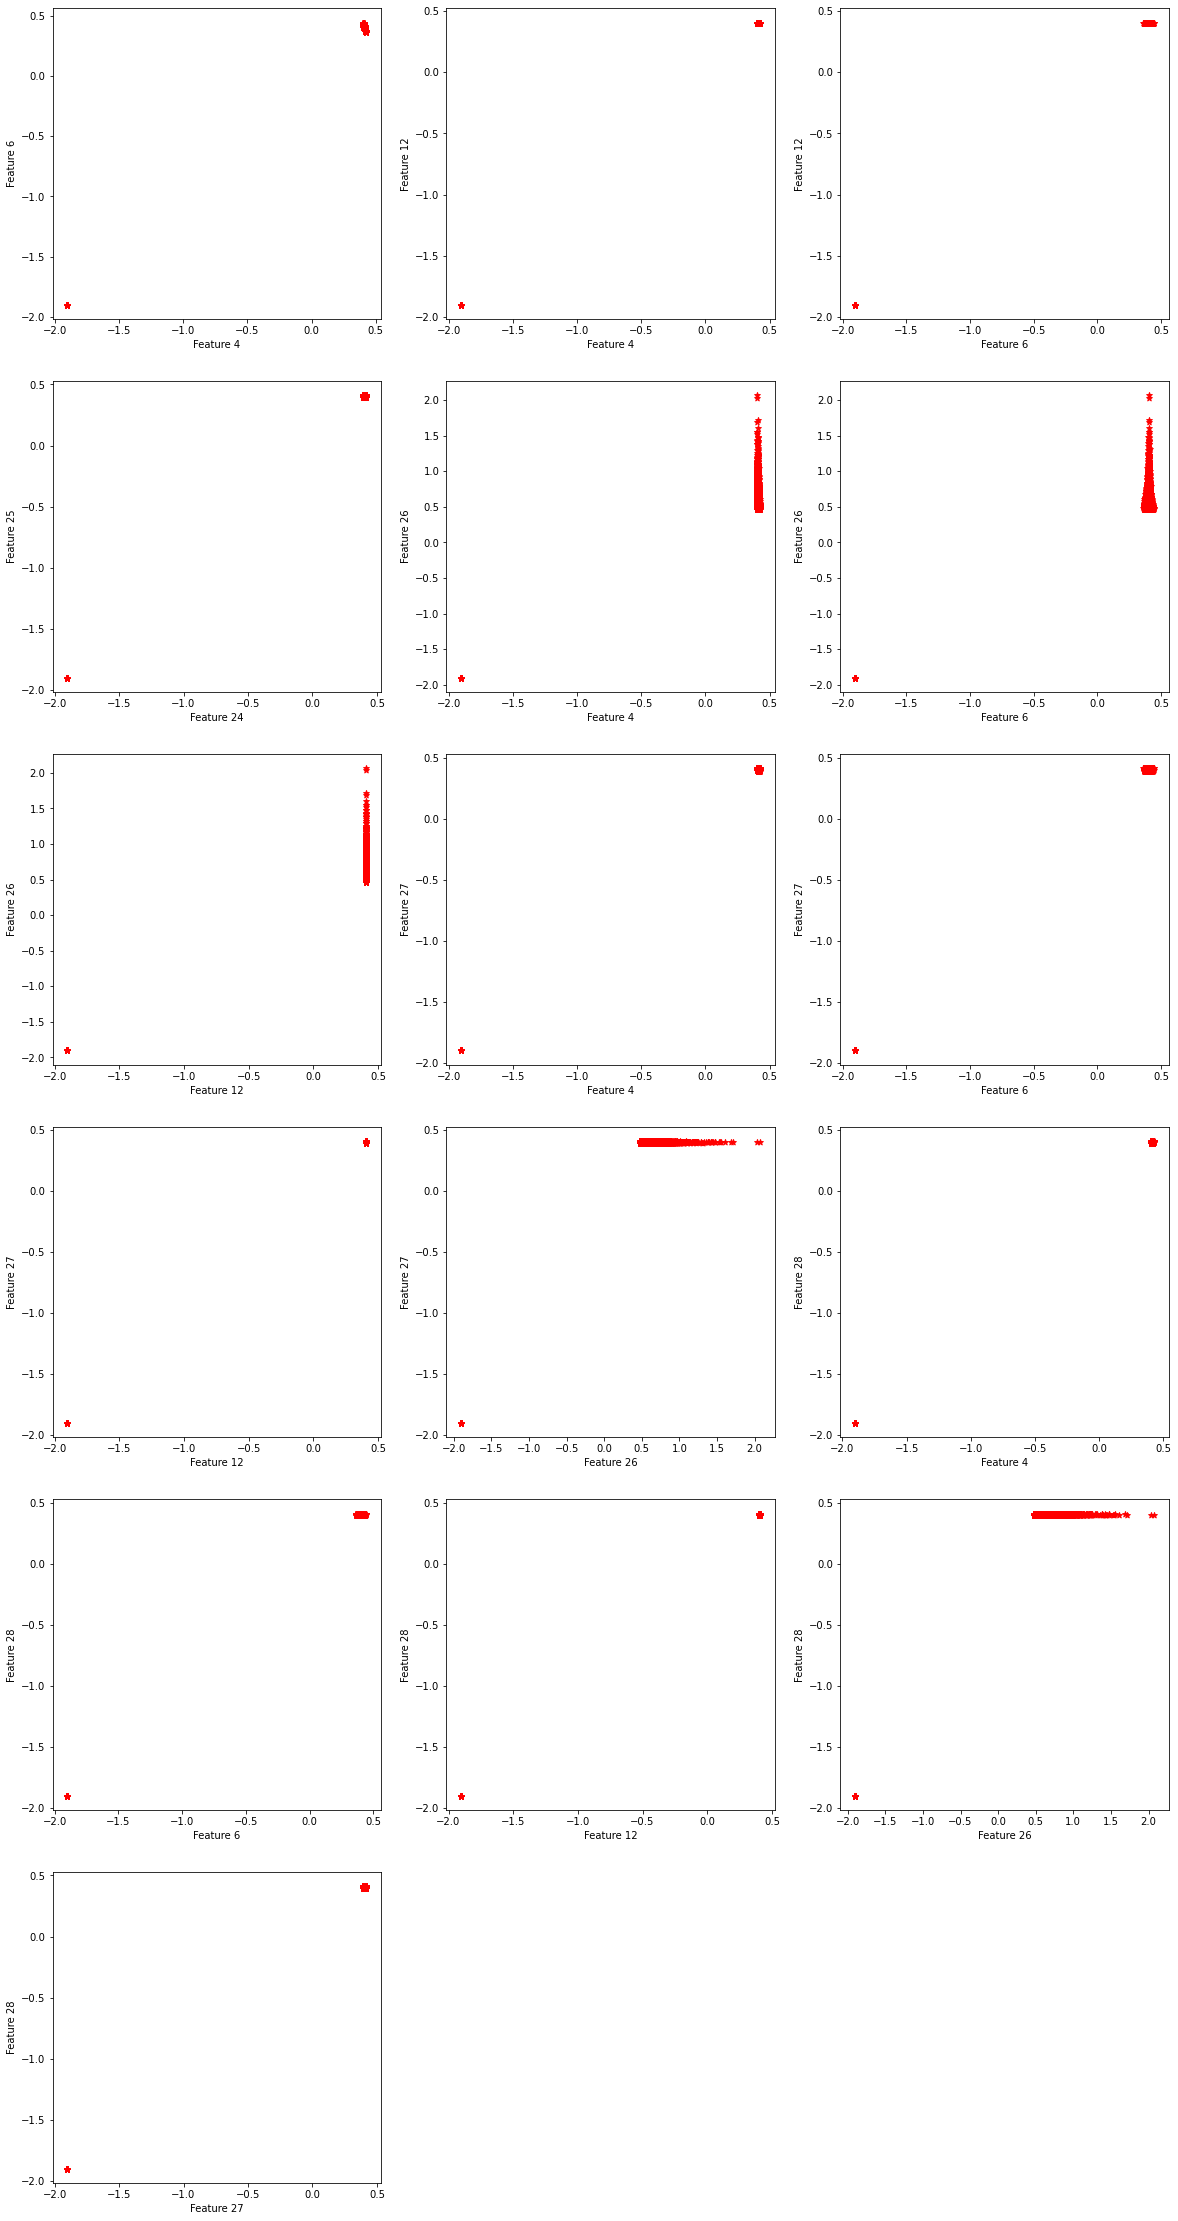

In [130]:
from math import *
#Visualization for the linear relation between feature
fig = plt.figure()
k = 1
for (i, j, r) in linear_relation : 
    ax = fig.add_subplot((len(linear_relation)//3)+1, 3, k)
    #we keep useless values to see the relation between features when one is -999
    ax.scatter(tX[:,i], tX[:,j], marker= "*", color= "r")
    ax.set_xlabel("Feature " + str(i))
    ax.set_ylabel("Feature " + str(j))
    k += 1
fig.set_size_inches(20, 40)

In [131]:
#As they are corrolated, we can remove one of the features in the final input 
column_array = np.int_([])
for (i, j, r) in linear_relation :
    if not (i in column_array) :
        column_array = np.append(column_array, i)
    else :
        if not (j in column_array) :
            column_array = np.append(column_array, j)
tX = np.delete(tX, column_array, axis=1)
tX.shape

(250000, 23)

We will now work only with 22 features

### Corrolation with prediction :

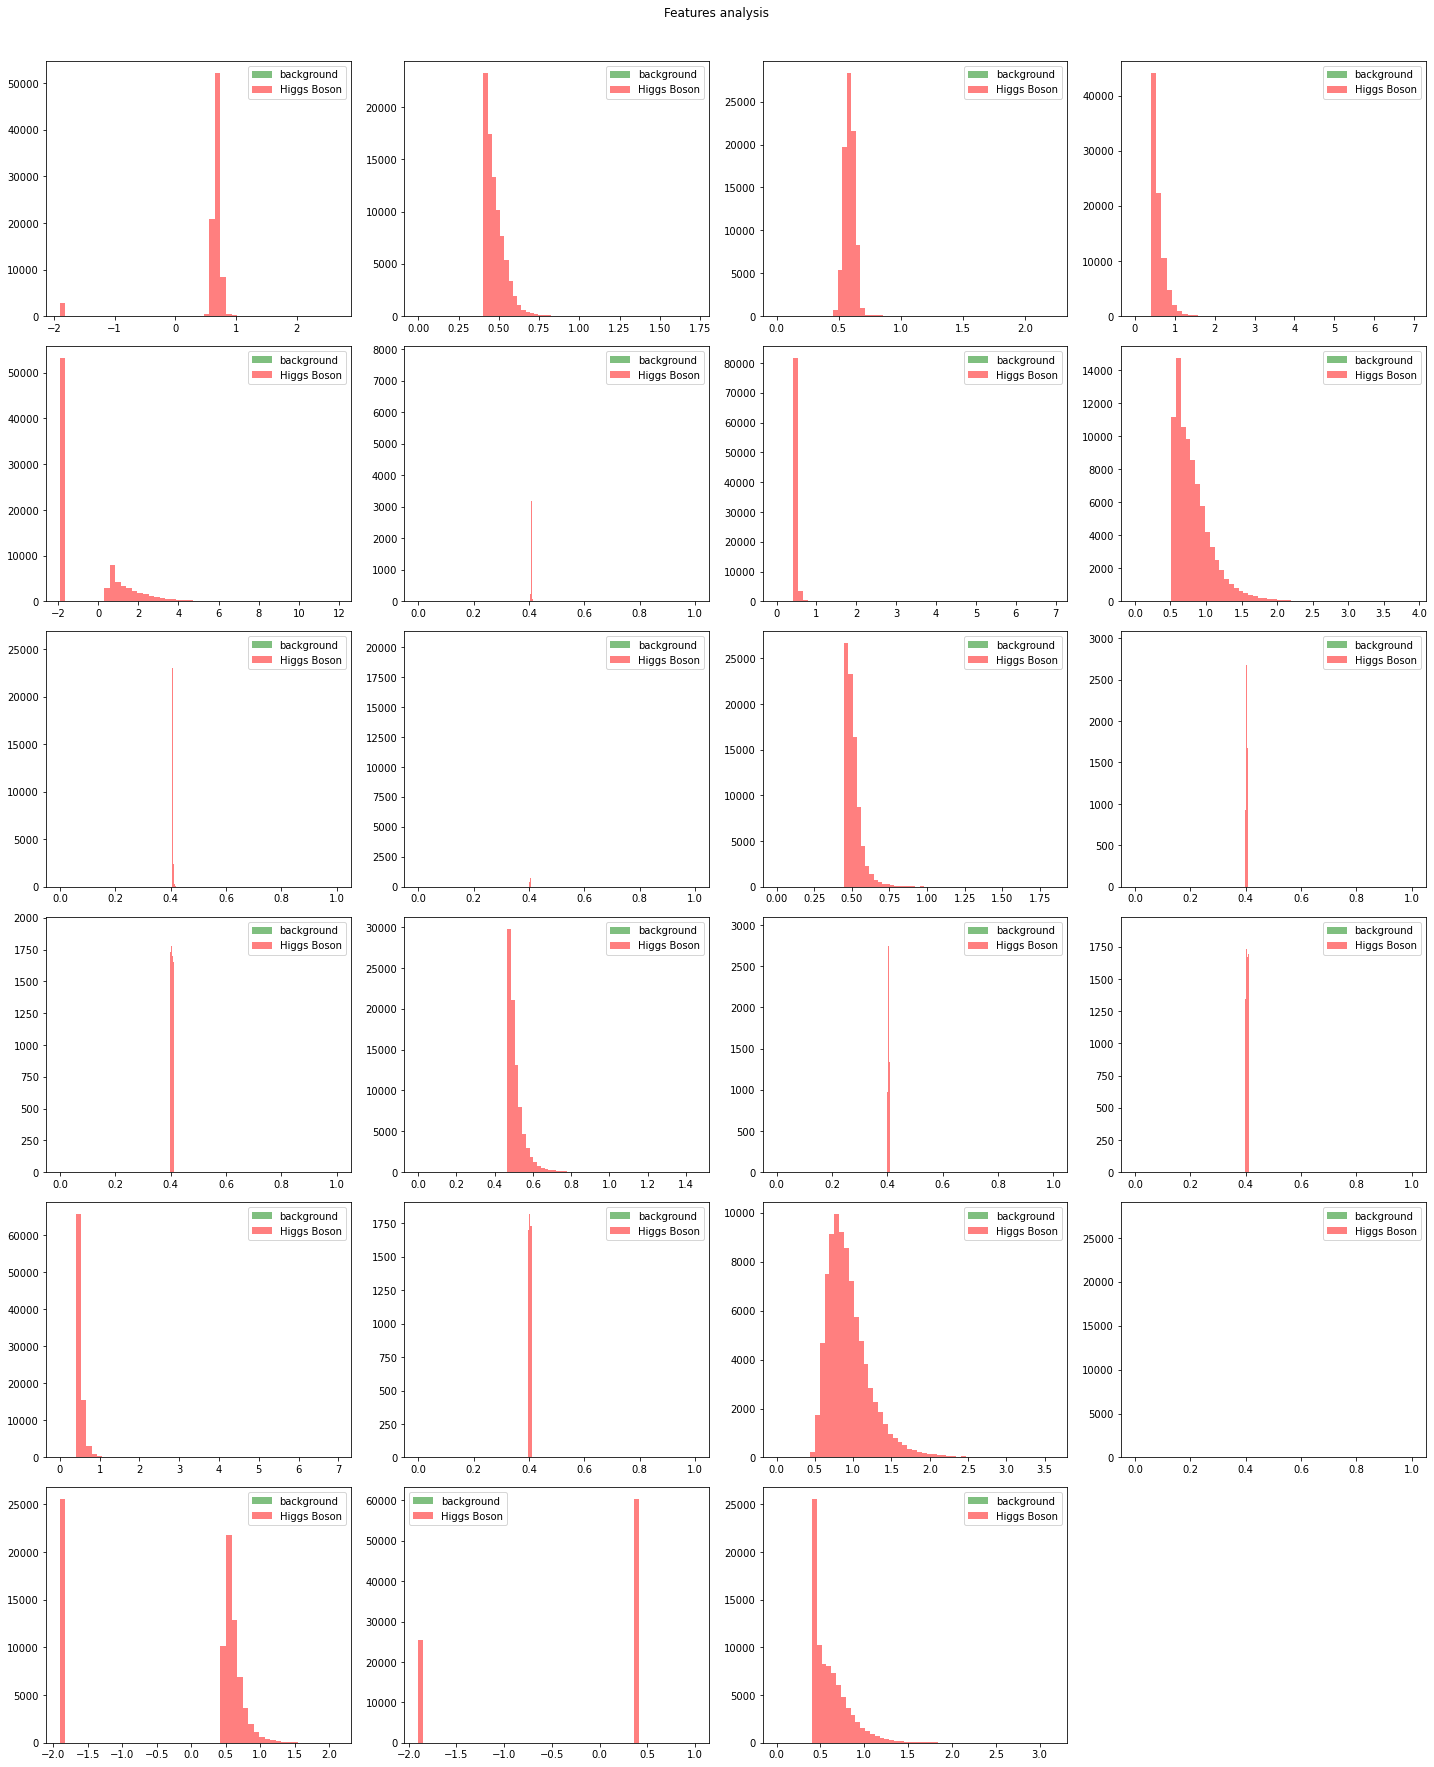

In [132]:
fig = plt.figure(figsize = (20, 25))
j = 0

#Constructing a new matrice for esier plot
y_reshaped = y.reshape(y.shape[0], 1)
mat = np.concatenate((y_reshaped, tX), axis=1)

#print (mat)
#print(mat_one)
    
#print(np.where(mat[:, 0] == -1.))
#print(mat[np.where(mat[:, 0] == -1.), 2])
for i in range(1, mat.shape[1]):
    plt.subplot(6, 4, j+1)
    j += 1
    mat_minus_one = mat[np.where(mat[:, 0] == -1.), i].flatten()
    mat_one = mat[np.where(mat[:, 0] == 1.), i].flatten()
    plt.hist(mat_minus_one[np.where(mat_minus_one != -999.)], bins= 50, color='g', label = 'background', alpha=0.5)
    plt.hist(mat_one[np.where(mat_one != -999.)], bins=50, color='r', label = 'Higgs Boson', alpha=0.5)
    plt.legend(loc='best')
fig.suptitle('Features analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [133]:
#Corrolation of features with the prediction
tX_y_relation = []
mat = np.corrcoef(tX, y, rowvar = 0)
print(mat)
for i in range(mat.shape[0]):
    for j in range(0, i):
        if mat[i, j] > 0.999:
            tX_y_relation.append((j, i, mat[i, j]))
print(tX_y_relation)
for (i, j, r) in tX_y_relation : 
    ax = fig.add_subplot((len(tX_y_relation)//3)+1, 3, k)
    #we keep useless values to see the relation between features when one is -999
    ax.scatter(tX[:,i], tX[:,j], marker= "*", color= "r")
    ax.set_xlabel("Feature " + str(i))
    ax.set_ylabel("Feature " + str(j))
    k += 1
fig.set_size_inches(20, 40)

[[ 1.00000000e+00 -4.55754982e-01  1.68547985e-01  1.98764690e-01
   1.60523916e-01  2.28104685e-01  4.58258755e-02  2.01464410e-01
  -1.70725931e-02  3.58962714e-01  1.31495478e-01  2.57909175e-03
  -6.17683359e-03  9.94446173e-02  1.00600077e-02 -7.44499050e-04
  -2.33723570e-01  7.41075286e-03  2.21984489e-01  2.21077743e-01
   2.50158444e-01  2.47078209e-01  1.85371791e-01  2.39149058e-01]
 [-4.55754982e-01  1.00000000e+00  1.90109488e-01 -2.49115929e-01
  -1.90392025e-01  4.32514093e-02  1.77575270e-02 -1.46836679e-01
   3.49503614e-01 -4.19757335e-01 -1.45464145e-01 -2.10917148e-03
   1.13208392e-03  3.10647518e-01 -6.77706784e-03  3.40330242e-04
   1.83716377e-01 -1.59253407e-02 -1.67810640e-01 -2.10537065e-01
  -2.29674008e-01 -2.20354527e-01 -2.10008918e-01 -3.51427956e-01]
 [ 1.68547985e-01  1.90109488e-01  1.00000000e+00 -6.25620208e-02
  -4.06198304e-02  5.79711617e-01 -7.02133930e-04  8.86852442e-02
   9.74898450e-02 -9.08458625e-02  2.90011159e-01  2.12659787e-03
  -3.624

### Trainer

In [134]:
# testing trainer with validation
loss, weights = trainer_val(y_val, tX_val, 10, least_squares_GD, compute_loss_mse, y_train, tX_train, [0] * tX_train.shape[1], 55, 0.0001)

In step:   0%|                                                                                  | 0/10 [00:00<?, ?it/s]

In run: 0, trained. Train loss: 0.1696665082202251, Val loss: 0.1708622916990655.
In run: 1, trained. Train loss: 0.1682944773672616, Val loss: 0.16947883219444182.
In run: 2, trained. Train loss: 0.16697403930087923, Val loss: 0.16814724466357878.


In step: 100%|██████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 125.34it/s]

In run: 3, trained. Train loss: 0.1657029325058276, Val loss: 0.1668652592048383.
In run: 4, trained. Train loss: 0.16447899727106008, Val loss: 0.16563070800558094.
In run: 5, trained. Train loss: 0.163884070779167, Val loss: 0.1650305695871297.


TP: 0, TN: 32770, FP: 0, FN: 17230


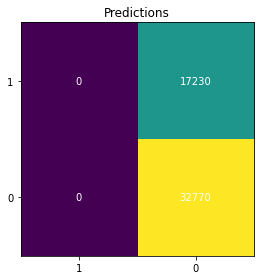

Recall: 0.0
Precision: nan
F_2 score: nan
Accruacy: 0.6554
MSE loss 0.1650305695871297
Prediction example [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [137]:
# Estimating the predictions on the validation set
# pred_val = tX_val@weights
pred_val = predict_labels(weights, tX_val) #### using -1!!!
# Confusion matrix
tp, tn, fp, fn = calc_rates(y_val, pred_val)
vis_conf_mtx(conf_matrix(tp, tn, fp, fn))
# Recall, Precision, F2-Score, Accruacy
f_score(recall(tp, fn), precision(tp, fp))
accruacy(tp, tn, fp, fn)
# Computing the mse resulting from the validation set
### odd: just predicted now again
mse_test = compute_loss_mse(y_val, tX_val, weights)
print("MSE loss", mse_test)
print("Prediction example", pred_val[:10])

# Training with the filtered dataset

In [136]:
OUTPUT_PATH = '../data/output.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)